<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7

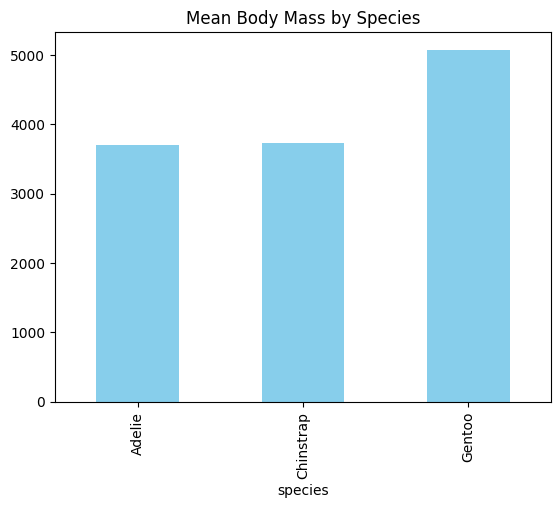

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins").copy()
print(df.info())
print(df.head())

df = df.dropna(subset=["species","bill_length_mm"])
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

bill_length_more45 = df.loc[df["bill_length_mm"] > 45]
dream_island = df.loc[df["island"] == "Dream"]
female_body_mass_more40 = df.loc[(df["sex"] == "Female") & (df["body_mass_g"] > 40)]

sorted_body_mass = df.sort_values("body_mass_g", ascending=False)

ranked_penguins = df.groupby("species")["flipper_length_mm"].rank(method="dense", ascending=False)

avg_body_mass = df.groupby(["species","island"])["body_mass_g"].mean().reset_index(drop=True)

df["mass_kg"] = df["body_mass_g"] / 1000
df["is_heavy"] = np.select(
    [df["body_mass_g"] > 4500],
    ["True"],
    default="False"
)
print(df.head())

diet = pd.DataFrame({
    "species": ["Adelie","Chinstrap","Gentoo"],
    "diet_type": ["krill","fish","squid"]
})

df1 = df.merge(diet,on="species", how="left")

standings = (df1
             .groupby("species", as_index=False)
             .agg(
                 count = ("body_mass_g","count"),
                 avg_mass = ("body_mass_g","mean")
             ))

print(standings)

df.groupby("species")["body_mass_g"].mean().plot(kind="bar", color="skyblue")
plt.title("Mean Body Mass by Species")
plt.show()
